In [1]:
import matplotlib.pyplot as plt
import matplotlib
from pylab import figure, text, scatter, show
import sys, math, numpy
import seaborn as sns
sns.set_theme()
sns.set_style(style='white')
sns.set_style("ticks")

In [2]:
def load_barriers(sysname):
    """Load the barrier data."""
    basedir = f"/scratch/users/zilins/6.proj_ges_imi/2.datasets/rawds"
    barrier = numpy.load(f"{basedir}/ges_imi.{sysname}.barrier.npy")
    return barrier

def load_clusters(cluster_l):
    """Load the cluster labels"""
    cluster_l = numpy.load(f"cluster_{cluster_l}.npy")
    return cluster_l

def load_cluster_barriers(sysname, cluster_l):
    """Load the barrier data in one cluster."""
    cl = load_clusters(cluster_l)
    de = load_barriers(sysname)
    
    de_cl = de[cl[numpy.where(cl<500)]] if sysname=='d1' else de[cl[numpy.where(cl>=500)]-500]
    return de_cl

In [3]:
from scipy.stats import ttest_ind

print(".... d1 vs d2 Welch's t-test")

very_sig_d1_d2 = []
sig_d1_d2 = []

for cl in range(4):
    d1_c = load_cluster_barriers('d1', cl)
    d2_c = load_cluster_barriers('d2', cl)
    ks, p = ttest_ind(d1_c, d2_c, equal_var=False)
    print(p)
    
    if p<0.001:
        very_sig_d1_d2.append(cl)
    
    if p>0.001 and p<=0.05:
        sig_d1_d2.append(cl)

.... d1 vs d2 Welch's t-test
1.1880658428457801e-32
2.2703967499717372e-06
0.08819338046827532
4.39030113746309e-08


In [4]:
print(".... d1 vs d1 Welch's t-test")

for cl_i in range(4):
    for cl_j in range(cl_i+1, 4):
        d1_i = load_cluster_barriers('d1', cl_i)
        d1_j = load_cluster_barriers('d1', cl_j)
        ks, p = ttest_ind(d1_i, d1_j, equal_var=False)
        
        if p < 0.05:
            print(cl_i, cl_j, p, "!!!!")
        else:
            print(cl_i, cl_j, p)
            
print("\n.... d2 vs d2 Welch's t-test")

for cl_i in range(4):
    for cl_j in range(cl_i+1, 4):
        d2_i = load_cluster_barriers('d2', cl_i)
        d2_j = load_cluster_barriers('d2', cl_j)
        ks, p = ttest_ind(d2_i, d2_j, equal_var=False)
                
        if p < 0.001:
            print(cl_i, cl_j, p, "!!!!")
        elif p < 0.05 and p >=0.001:
            print(cl_i, cl_j, p, "~~~~")
        else:
            print(cl_i, cl_j, p)

.... d1 vs d1 Welch's t-test
0 1 1.0080629106413226e-07 !!!!
0 2 0.2246901393155753
0 3 8.232927177338233e-08 !!!!
1 2 0.00015454624262799247 !!!!
1 3 0.6673818587465156
2 3 0.0003092762895552585 !!!!

.... d2 vs d2 Welch's t-test
0 1 2.4938536401100023e-09 !!!!
0 2 0.9097998871473749
0 3 0.00027240758821768334 !!!!
1 2 0.0029410583495534633 ~~~~
1 3 0.11673713635977766
2 3 0.041969420368862975 ~~~~


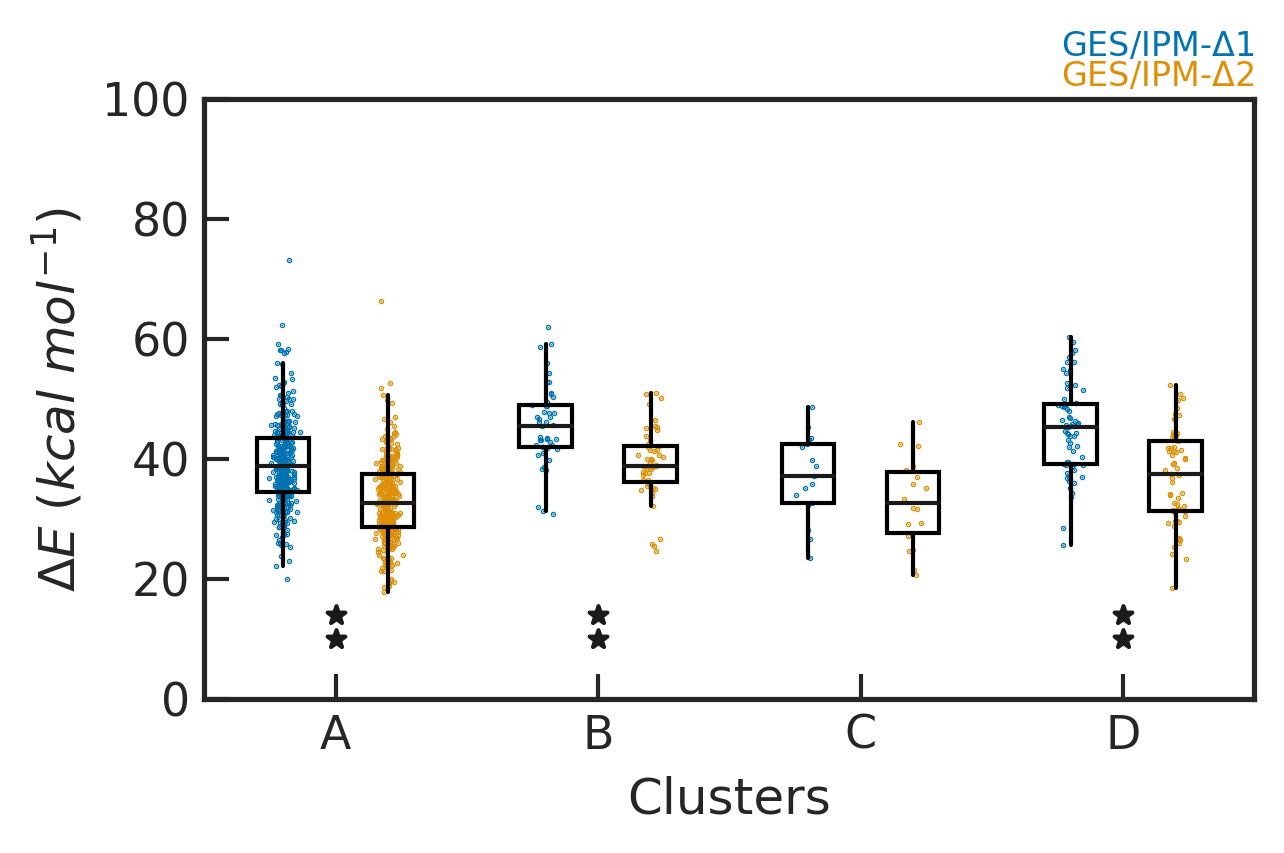

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 2.8), dpi=300, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=.75/4.5, right=4.25/4.5, top=2.5/2.8, bottom=.5/2.8)


ax.text(1., 1.06, r'GES/IPM-$\Delta$1', ha='right', va='bottom', transform=ax.transAxes, fontsize=8, color=sns.color_palette('colorblind')[0])
ax.text(1., 1.01, r'GES/IPM-$\Delta$2', ha='right', va='bottom', transform=ax.transAxes, fontsize=8, color=sns.color_palette('colorblind')[1])

for cl in range(4):
    ener1_cl = load_cluster_barriers('d1', cl)
    ener2_cl = load_cluster_barriers('d2', cl)
    
    ener1_boxes = ax.boxplot(x=ener1_cl, positions=[cl-.2], widths=0.2, showcaps=False, 
                             showfliers=False, medianprops=dict(color='k'), patch_artist=True, vert=True)
    
    ener2_boxes = ax.boxplot(x=ener2_cl, positions=[cl+.2], widths=0.2, showcaps=False, 
                             showfliers=False, medianprops=dict(color='k'), patch_artist=True, vert=True)
    
    plt.setp(ener1_boxes["boxes"], facecolor='#00000000')
    plt.setp(ener2_boxes["boxes"], facecolor='#00000000')
    
    ax.scatter(y=ener1_cl, x=numpy.random.normal(loc=[cl-.2], scale=0.02, size=ener1_cl.shape[0]), 
               s=0.1, color=sns.color_palette('colorblind')[0])
    ax.scatter(y=ener2_cl, x=numpy.random.normal(loc=[cl+.2], scale=0.02, size=ener2_cl.shape[0]), 
               s=0.1, color=sns.color_palette('colorblind')[1])                        
        
ax.scatter(y=numpy.ones(len(very_sig_d1_d2))*14, 
           x=very_sig_d1_d2, s=20, color='k', marker='*')
ax.scatter(y=numpy.ones(len(very_sig_d1_d2))*10, 
           x=very_sig_d1_d2, s=20, color='k', marker='*')
ax.scatter(y=numpy.ones(len(sig_d1_d2))*12, 
           x=sig_d1_d2, s=20, color='k', marker='*')
# ax.scatter([0.8], [94], s=20, color=sns.color_palette('colorblind')[0], marker='*')
# ax.plot([-.2, -.2, 1.8, 1.8], [89, 91, 91, 89], c=sns.color_palette('colorblind')[0], lw=1, zorder=1)
# ax.scatter([1.8], [82], s=20, color=sns.color_palette('colorblind')[0], marker='*')
# ax.plot([.8, .8, 2.8, 2.8], [87, 85, 85, 87], c=sns.color_palette('colorblind')[0], lw=1, zorder=1)


ax.set_xlim(-.5, 3.5)
ax.set_ylim( 0, 100.)
ax.tick_params(which='major', direction='in', length=6, width=1)
ax.set_xticks(numpy.arange(4))
ax.set_xticklabels(['A', 'B',  'C', 'D'])

ax.set_ylabel(r'$\Delta$$E$'+r' $(kcal$ $mol^{-1})$')
ax.set_xlabel(r'Clusters')

fig.savefig('cluster_ener.png')